# Data exploration

Two datasets available from kaggle: https://www.kaggle.com/zynicide/wine-reviews

- winemag-data_first150k.csv
- winemag-data-130k-v2.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup as soup
from functools import reduce

## Dataset wines1: winemag-data_first150k.csv

In [2]:
wines1 = pd.read_csv("../data/winemag-data_first150k.csv", index_col=0)
wines1

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [3]:
wines1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


<font color=blue>10 columns:
- 2 numerical
- 8 object type

Some values missing on designation (45 000), price (13 000), region_1 and region_2</font>

In [4]:
wines1.drop_duplicates(inplace=True)
wines1

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
149635,US,A Syrah-Grenache blend that's dry and rustical...,Bungalow Red,84,15.0,California,Santa Barbara County,Central Coast,Syrah-Grenache,Casa Barranca
149636,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia
149637,US,"Outside of the vineyard, wines like this are w...",NaN,84,6.0,California,California,California Other,Merlot,Delicato
149638,Argentina,"Heavy and basic, with melon and pineapple arom...",NaN,84,9.0,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo


In [5]:
150930-97851

53079

<font color=blue>53079 duplicates removed from wines1

## Dataset wines2: winemag-data-130k-v2.csv

In [6]:
wines2 = pd.read_csv("../data/winemag-data-130k-v2.csv", index_col=0)
wines2

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [7]:
wines2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


<font color=blue>13 columns:
- 2 numericals
- 11 object type
    
The columns are the same as the dataset wines1 plus 3 additional columns:
- taster_name
- taster_twitter_handle
- title
    
Missing values on designation, region_1, region_2, taster_name and taster_twitter_handle</font>

<font color=blue>**=> concatenation of the two datasets wines1 and wines2 for common data exploration**</font>

In [8]:
wines2.drop_duplicates(inplace=True)
wines2

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


<font color=blue>approx 20k duplicates removed in wines2

## Concatenation of the two datasets

In [9]:
wines = pd.concat([wines1, wines2], axis=0, ignore_index=True)
wines

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217834,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
217835,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
217836,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
217837,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [10]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217839 entries, 0 to 217838
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                217777 non-null  object 
 1   description            217839 non-null  object 
 2   designation            153398 non-null  object 
 3   points                 217839 non-null  int64  
 4   price                  200724 non-null  float64
 5   province               217777 non-null  object 
 6   region_1               182347 non-null  object 
 7   region_2               86260 non-null   object 
 8   variety                217838 non-null  object 
 9   winery                 217839 non-null  object 
 10  taster_name            95071 non-null   object 
 11  taster_twitter_handle  90542 non-null   object 
 12  title                  119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 21.6+ MB


<font color=blue>concatenation OK, NaN automatically added on the 3 columns missing in wines1</font>

In [11]:
(wines.drop(["taster_name","taster_twitter_handle","title"],axis=1)).drop_duplicates()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
217834,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
217835,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation
217836,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser
217837,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss


### Numerical variables

<font color=blue>The 2 numerical variables are points and price. </font>

In [12]:
wines.describe()

,points,price
count,217839.000000,200724.000000
mean,88.224152,34.749542
std,3.159017,40.207151
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


<font color=blue> 
- points range from 80 to 100
- price ranges from 4 to 3,300 (check currency)</font>

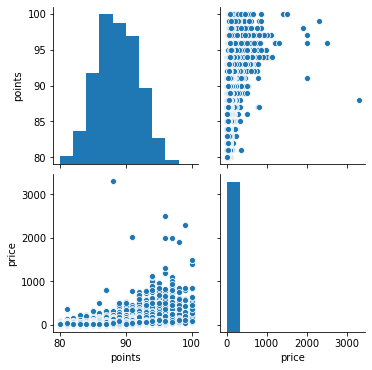

In [13]:
sns.pairplot(wines)
plt.show()

<font color=blue>No apparent correlation between points and price</font>

#### Points

<font color=blue>**Kaggle description for points:** the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score &gt;=80)</font>

In [14]:
wines.points.describe()

count    217839.000000
mean         88.224152
std           3.159017
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

<font color=blue>dtype is float, change dtype to integer

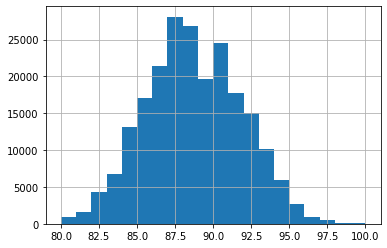

In [15]:
wines['points'].hist(bins=20)
plt.show()

<font color=blue> 
- Normal distribution of the points
- No NaNs</font>

#### Price

<font color=blue> Kaggle description:
- price: The cost for a bottle of the wine
</font>

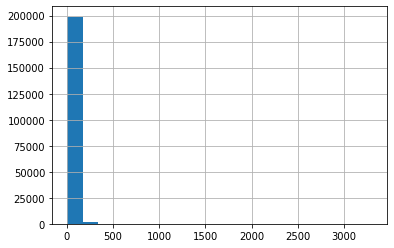

In [16]:
wines.price.hist(bins=20)
plt.show()

<font color=blue> 
- Currency unknown
- maybe analyze by range of price, most wines fall below 500</font>

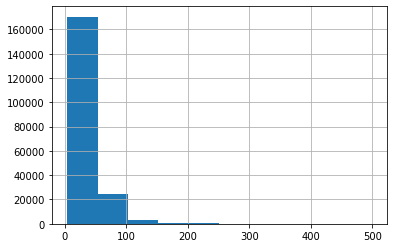

In [17]:
wines_low = wines[wines["price"]<500]
wines_low["price"].hist()
plt.show()

<font color=blue>More than 90% of the wine have price below than 100. Maybe use categories of prices (low, medium, high)</font>

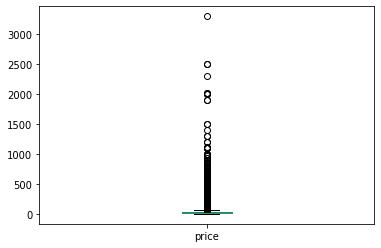

In [18]:
wines.price.plot.box()
plt.show()

<font color=blue>Box plot confirms ourliers in terms of price.</font>

### Categorical variables

#### Country

<font color=blue>Kaggle column description: The country that the wine is from</font>

In [19]:
wines.country.value_counts()

US                        91001
France                    34812
Italy                     32790
Spain                     11559
Portugal                   8764
Chile                      7919
Argentina                  6991
Australia                  5349
Austria                    4993
Germany                    3521
New Zealand                3143
South Africa               2782
Greece                      973
Israel                      836
Canada                      375
Hungary                     268
Romania                     208
Bulgaria                    188
Uruguay                     150
Slovenia                    149
Croatia                     140
Turkey                      127
Mexico                      122
Georgia                     106
Moldova                     102
England                      72
Brazil                       63
Lebanon                      59
Morocco                      35
Cyprus                       25
Macedonia                    23
Ukraine 

In [20]:
len(wines.country.value_counts())

50

<font color=blue>nº countries = 50</font>

#### Description

<font color=blue>Kaggle column description: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.</font>

In [21]:
wines.description.describe(include=all)

count                                                217839
unique                                               169430
top       90–92. Barrel sample. This is a solid and dens...
freq                                                      4
Name: description, dtype: object

<font color=blue>Maybe look for the words most repeated in *description*

#### Province

<font color=blue>Kaggle column description: The province or state that the wine is from</font>

In [22]:
wines.groupby("country")["province"].value_counts().to_frame()

province
country   province                  
Albania   Mirditë                  1
Argentina Mendoza Province      5959
          Other                 1032
Armenia   Armenia                  2
Australia South Australia       3176
...                              ...
Uruguay   Montevideo              13
          San Jose                 9
          Atlantida                7
          Colonia                  2
          El Colorado              1

[490 rows x 1 columns]

<font color=blue>490 provinces, best to focus on countries

#### Designation

<font color=blue>Kaggle column description: The vineyard within the winery where the grapes that made the wine are from

In [23]:
wines.designation

0                              Martha's Vineyard
1           Carodorum Selección Especial Reserva
2                  Special Selected Late Harvest
3                                        Reserve
4                                     La Brûlade
                           ...                  
217834    Brauneberger Juffer-Sonnenuhr Spätlese
217835                                       NaN
217836                                     Kritt
217837                                       NaN
217838             Lieu-dit Harth Cuvée Caroline
Name: designation, Length: 217839, dtype: object

In [24]:
wines.designation.describe(include=all)

count      153398
unique      47239
top       Reserve
freq         3640
Name: designation, dtype: object

<font color=blue> 
- Designation seems very general terms about the wine.
- Maybe try to correlate with the name of the wine if NaN for the name.
- 1/3 are NaNs

#### region_1 & region_2

<font color=blue> Kaggle column description:
- region_1: The wine growing area in a province or state (ie Napa)
- region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

In [25]:
wines.region_1.describe(include=all)

count          182347
unique           1332
top       Napa Valley
freq             8305
Name: region_1, dtype: object

In [26]:
wines.region_2.describe(include=all)

count             86260
unique               18
top       Central Coast
freq              18611
Name: region_2, dtype: object

<font color=blue>Many NaNs for region two. Too many unique values for regions and besides those columns refer to a province. As we already discuss that country would be sufficient classification level for our study, the columns region will be dropped.

#### Variety

<font color=blue>Kaggle column description: The type of grapes used to make the wine (ie Pinot Noir) - *cépage/tipo de uva*

In [27]:
wines.variety.value_counts() 

Pinot Noir                  21561
Chardonnay                  20031
Cabernet Sauvignon          17112
Red Blend                   14728
Bordeaux-style Red Blend    11647
                            ...  
Frankovka                       1
Malbec-Carménère                1
Petit Courbu                    1
Kotsifali                       1
Pinot Blanc-Viognier            1
Name: variety, Length: 756, dtype: int64

In [28]:
wines.variety.describe(include=all)

count         217838
unique           756
top       Pinot Noir
freq           21561
Name: variety, dtype: object

<font color=blue> 756 different varieties. Might be interesting to link it to the price and country.

In [29]:
wines[wines["variety"]=="Pinot Noir"].country.value_counts()

US              15847
France           3261
New Zealand       988
Chile             550
Australia         241
Argentina         179
Austria           157
Germany            89
South Africa       47
Canada             36
Spain              31
Romania            29
Portugal           24
Bulgaria           17
Israel             14
Italy              12
Slovenia           11
Uruguay             6
England             6
Macedonia           3
Brazil              2
Hungary             2
Switzerland         2
Croatia             2
Moldova             1
Name: country, dtype: int64

In [30]:
wines[wines["variety"]=="Pinot Noir"].price.describe()

count    20637.000000
mean        46.529437
std         43.497788
min          5.000000
25%         28.000000
50%         41.000000
75%         55.000000
max       2500.000000
Name: price, dtype: float64

#### Winery

<font color=blue>Kaggle column description: The winery that made the wine

In [31]:
wines.winery.value_counts()

Williams Selyem                  439
Testarossa                       372
DFJ Vinhos                       348
Chateau Ste. Michelle            327
Wines & Winemakers               324
                                ... 
Les Vignerons du Mont-Ventoux      1
Redwood Ridge Estate               1
Cantina Tomaso Gianolio            1
Casetto                            1
Doran                              1
Name: winery, Length: 19186, dtype: int64

In [32]:
wines.winery.describe(include=all)

count              217839
unique              19186
top       Williams Selyem
freq                  439
Name: winery, dtype: object

<font color=blue> No NaNs, many unique values. Maybe study can be performed looking at the winery rather than wine's name.

In [33]:
wines.groupby("winery")["points"].mean().sort_values(ascending=False)

winery
Sloan                    100.0
Ovid                      97.0
Araujo                    97.0
Gandona                   97.0
Domaine des Lambrays      96.4
                         ...  
BookCliff                 80.0
Catharine Valley          80.0
Estrella Creek            80.0
Chateau Nico Lazaridi     80.0
Forbidden Zin             80.0
Name: points, Length: 19186, dtype: float64

<font color=blue> if winery have one wine reviewed, points mean is biased !

#### taster_name

<font color=blue> no column description in Kaggle

In [34]:
wines.taster_name

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
217834    Anna Lee C. Iijima
217835          Paul Gregutt
217836            Roger Voss
217837            Roger Voss
217838            Roger Voss
Name: taster_name, Length: 217839, dtype: object

In [35]:
wines.taster_name.describe(include=all)

count          95071
unique            19
top       Roger Voss
freq           23560
Name: taster_name, dtype: object

<font color=blue>19 unique tasters. Many NaNs as this column was not present in dataset wines1. Maybe drop this column.
    

#### taster_twitter_handle

<font color=blue> No column description in kaggle

In [36]:
wines.taster_twitter_handle

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
217834            NaN
217835    @paulgwine 
217836     @vossroger
217837     @vossroger
217838     @vossroger
Name: taster_twitter_handle, Length: 217839, dtype: object

In [37]:
wines.taster_twitter_handle.describe()

count          90542
unique            15
top       @vossroger
freq           23560
Name: taster_twitter_handle, dtype: object

In [38]:
wines.taster_twitter_handle.value_counts()

@vossroger          23560
@wineschach         14046
@kerinokeefe         9697
@paulgwine           8868
@vboone              8708
@mattkettmann        5730
@JoeCz               4766
@wawinereport        4461
@gordone_cellars     3766
@AnneInVino          3290
@laurbuzz            1700
@suskostrzewa        1023
@worldwineguys        897
@bkfiona               24
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

<font color=blue>Seems to be the twitter account of tasters. 4 tasters have no twitter account or are missing. Same as taster_name column with NaNs as this column does not exist in dataset wines1. Propose to drop this column.

#### title

<font color=blue>Kaggle column description: The title of the wine review, which often contains the vintage if you're interested in extracting that feature

In [39]:
wines.title

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
217834    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
217835                    Citation 2004 Pinot Noir (Oregon)
217836    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
217837        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
217838    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 217839, dtype: object

In [40]:
wines.title.describe()

count                                                119988
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                      9
Name: title, dtype: object

In [41]:
wines[wines["title"]=="Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)"]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
101053,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
102235,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
125204,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
158546,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
175298,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
186922,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
192589,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
199830,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
211249,US,This bubbly is rich in cherry and raspberry fr...,Sonoma Brut,86,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...


<font color=blue> 
- Many NaNs but column can be usefull to extract the vintage of the wine.
- It looks like information from other columns are nested in the title such as variety, regions, province, etc
- Get vintage of each wine from "title" variable and append to new column.
- Title is the only complete designation that identifies the wine. the wines from wines1 have no title and then no vintage so the wine cannot be identified properly. Therefore only unique wines from wines2 will be used in the analysis.

# Data cleaning

### Questions
- What makes a good wine ?
- Where is the most expensive wine from ?
- What is the country that export the most wines ?
- Consumption pattern of wine by country
- Tips to select a good wine ?

### Insights from data exploration

- Regions: eliminate Region1 and Region2
- drop taster_name & taster_twitter_handle
- Change point type to integers
<font color=red> 
- look for the words most repeated in description
- compare designation and title columns</font>
- Extract vintage and other information from title to fill NaNs and create a new column vintage

#### Copy of raw data

In [42]:
wines=wines2.copy()
wines

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#### Drop unwanted columns

In [43]:
wines.drop(["taster_name","taster_twitter_handle","region_1","region_2", "designation"], axis=1,inplace=True)
wines

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#### Change point variable type

In [44]:
wines["points"].astype(int)

0         87
1         87
2         87
3         87
4         87
          ..
129966    90
129967    90
129968    90
129969    90
129970    90
Name: points, Length: 119988, dtype: int64

In [45]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      119929 non-null  object 
 1   description  119988 non-null  object 
 2   points       119988 non-null  int64  
 3   price        111593 non-null  float64
 4   province     119929 non-null  object 
 5   title        119988 non-null  object 
 6   variety      119987 non-null  object 
 7   winery       119988 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.2+ MB


#### Drop rows where price is NaN

In [46]:
wines[wines["price"].isnull()]

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,Italy,This is dominated by oak and oak-driven aromas...,87,NaN,Sicily & Sardinia,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,France,Red cherry fruit comes laced with light tannin...,86,NaN,Beaujolais,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,Italy,Merlot and Nero d'Avola form the base for this...,86,NaN,Sicily & Sardinia,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",86,NaN,Sicily & Sardinia,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...
129844,Italy,"Doga delle Clavule is a neutral, mineral-drive...",86,NaN,Tuscany,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo
129860,Portugal,This rich wine has a firm structure as well as...,90,NaN,Douro,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca
129863,Portugal,This mature wine that has 50% Touriga Nacional...,90,NaN,Dão,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo
129893,Italy,"Aromas of passion fruit, hay and a vegetal not...",91,NaN,Veneto,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare


In [47]:
wines = wines[wines['price'].notna()]
wines

,country,description,points,price,province,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#### Drop rows where country and/or province is NaN

In [48]:
wines[wines["country"].isnull()].info() # 55 rows with NaN country

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 913 to 129900
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      0 non-null      object 
 1   description  55 non-null     object 
 2   points       55 non-null     int64  
 3   price        55 non-null     float64
 4   province     0 non-null      object 
 5   title        55 non-null     object 
 6   variety      55 non-null     object 
 7   winery       55 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ KB


In [49]:
wines = wines[wines['country'].notna()]

In [50]:
wines[wines["province"].isnull()].info() # All rows in NaN in "province" have been droped since they were only NaN in country

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      0 non-null      object 
 1   description  0 non-null      object 
 2   points       0 non-null      int64  
 3   price        0 non-null      float64
 4   province     0 non-null      object 
 5   title        0 non-null      object 
 6   variety      0 non-null      object 
 7   winery       0 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 0.0+ bytes


In [51]:
wines = wines[wines['variety'].notna()]

In [52]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111537 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      111537 non-null  object 
 1   description  111537 non-null  object 
 2   points       111537 non-null  int64  
 3   price        111537 non-null  float64
 4   province     111537 non-null  object 
 5   title        111537 non-null  object 
 6   variety      111537 non-null  object 
 7   winery       111537 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.7+ MB


#### Initialize vintage column with 0

In [53]:
wines["vintage"]=0

In [54]:
wines

,country,description,points,price,province,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),0
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,0
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,0


#### Populate vintage column with year in title

In [55]:
def vintage_extract(text):
    year = re.findall(r"\d{4}",text)
    if len(year) == 1:
        return year[0]
    elif len(year) ==0:
        return 0
    elif len(year)>1:
        year = list(map(int,year))
        while max(year)>2020:
            year.remove(max(year))
        return max(year)
    
wines["vintage"]=wines["title"].apply(vintage_extract)

wines.head()

,country,description,points,price,province,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


<font color=blue> Drop wines that have no vintage as they represents less than 5% of the values. Note that those wine without vintage often refers to sparkling wines such as champagne for which the vintage does not matter much.

#### Change vintage type to integer

In [56]:
wines["vintage"] = wines["vintage"].astype(int)

In [57]:
wines[wines["vintage"]!=0].describe()

,points,price,vintage
count,107714.000000,107714.000000,107714.000000
mean,88.450666,35.769361,2010.610338
std,3.099578,42.321927,4.306627
min,80.000000,4.000000,1607.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


#### filtering by vintage

In [58]:
wines[wines["vintage"]!=0]["vintage"].sort_values().to_frame().head(30)

,vintage
71238,1607
84335,1821
42594,1821
43085,1821
113629,1821
86242,1827
19136,1827
58097,1847
23333,1872
39897,1882


In [59]:
wines[wines["vintage"]==1941]

,country,description,points,price,province,title,variety,winery,vintage
90583,Portugal,While this wine from a year that was not decla...,93,770.0,Port,Kopke 1941 Colheita Tawny (Port),Port,Kopke,1941


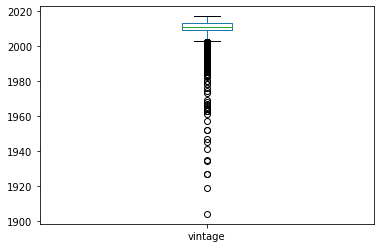

In [60]:
wines[wines["vintage"]>1900]["vintage"].plot.box()

## Data export

### Data export wines dataset

In [61]:
wines.to_csv("../data/wines_clean_dataset.csv")
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111537 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      111537 non-null  object 
 1   description  111537 non-null  object 
 2   points       111537 non-null  int64  
 3   price        111537 non-null  float64
 4   province     111537 non-null  object 
 5   title        111537 non-null  object 
 6   variety      111537 non-null  object 
 7   winery       111537 non-null  object 
 8   vintage      111537 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 8.5+ MB


### Data export champagne dataset

In [62]:
champagne_clean_dataset = wines[wines["vintage"]==0]
champagne_clean_dataset = champagne_clean_dataset.drop(["vintage"], axis=1)
champagne_clean_dataset.to_csv("../data/champagne_clean_dataset.csv")
champagne_clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 63 to 129929
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      3823 non-null   object 
 1   description  3823 non-null   object 
 2   points       3823 non-null   int64  
 3   price        3823 non-null   float64
 4   province     3823 non-null   object 
 5   title        3823 non-null   object 
 6   variety      3823 non-null   object 
 7   winery       3823 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 268.8+ KB


## Most common words in "description"

### Getting a list with top 100 most frequent english words

In [63]:
# Finding 100 most frequent words in description
from collections import Counter

In [64]:
# Scraping wikipedia to get list of 100 most common words in English and remove them from list

url = "https://en.wikipedia.org/wiki/Most_common_words_in_English"
response = requests.get(url)
soup = soup(response.content, "html.parser")

In [65]:
common_words_raw = []
for i in range(len(soup.find_all("a", class_="extiw"))):
    common_words_raw.append(soup.find_all("a", class_="extiw")[i].get_text())
common_words_raw = common_words_raw[:-2]

In [66]:
# removing "good" since it could also be applied to wine
common_words_raw.remove("good")

In [74]:
common_words = common_words_raw
common_words

['the',
 'be',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 'have',
 'I',
 'it',
 'for',
 'not',
 'on',
 'with',
 'he',
 'as',
 'you',
 'do',
 'at',
 'this',
 'but',
 'his',
 'by',
 'from',
 'they',
 'we',
 'say',
 'her',
 'she',
 'or',
 'an',
 'will',
 'my',
 'one',
 'all',
 'would',
 'there',
 'their',
 'what',
 'so',
 'up',
 'out',
 'if',
 'about',
 'who',
 'get',
 'which',
 'go',
 'me',
 'when',
 'make',
 'can',
 'like',
 'time',
 'no',
 'just',
 'him',
 'know',
 'take',
 'people',
 'into',
 'year',
 'your',
 'some',
 'could',
 'them',
 'see',
 'other',
 'than',
 'then',
 'now',
 'look',
 'only',
 'come',
 'its',
 'over',
 'think',
 'also',
 'back',
 'after',
 'use',
 'two',
 'how',
 'our',
 'work',
 'first',
 'well',
 'way',
 'even',
 'new',
 'want',
 'because',
 'any',
 'these',
 'give',
 'day',
 'most',
 'us']

### Finding most repeated words in "description" variable

In [70]:
pd.Series(' '.join(wines['description']).lower().split()).value_counts()[:100]

and       302138
the       190242
a         154082
of        149568
with      103765
           ...  
out         5558
pepper      5537
into        5463
up          5442
just        5376
Length: 100, dtype: int64

In [83]:
# Functions that takes out TOP 50 words by number in the "description" column of the dataframe indicated

def top_words(df):
    top_words_raw = Counter(" ".join(df["description"].str.lower()).split()).most_common(50)
    
    common_words = []
    for i in range(len(soup.find_all("a", class_="extiw"))):
        common_words.append(soup.find_all("a", class_="extiw")[i].get_text())
    common_words = common_words[:-2]

    top_words = [i for i in top_words_raw if i[0] not in common_words]
    return top_words


In [97]:
raw_list_words = [i[0] for i in top_words(wines)]
final_top_words = ["flavors", "aromas", "fruit", "palate", "black", "ripe", "acidity", "tannins", "red", "cherry", "notes", "fresh", "rich", "spice", "blend", "white", "berry"]
len(final_top_words)
final_top_words

['flavors',
 'aromas',
 'fruit',
 'palate',
 'black',
 'ripe',
 'acidity',
 'tannins',
 'red',
 'cherry',
 'notes',
 'fresh',
 'rich',
 'spice',
 'blend',
 'white',
 'berry']

### Finding top words by "wines" segmentation (country and points)

In [85]:
# Wines by country

wines_US = wines.loc[wines['country'] == "US", ['description']]
wines_France = wines.loc[wines['country'] == "France", ['description']]
wines_Italy = wines.loc[wines['country'] == "Italy", ['description']]
wines_Spain = wines.loc[wines['country'] == "Spain", ['description']]

top_words_total = top_words(wines)
top_words_US = top_words(wines_US)
top_words_France = top_words(wines_France)
top_words_Italy = top_words(wines_Italy)
top_words_Spain = top_words(wines_Spain)


In [86]:
# Wines by rating

wines_over90 = wines.loc[wines['points'] >=90, ['description']]
wines_under90 = wines.loc[wines['points'] <90, ['description']]

top_words_over90 = top_words(wines_over90)
top_words_under90 = top_words(wines_under90)

In [87]:
# creating dataframe for each selection and their top word counts

total = pd.DataFrame(top_words_total, columns = ['word', 'count_total']) 
US = pd.DataFrame(top_words_US, columns = ['word', 'count_US']) 
France = pd.DataFrame(top_words_France, columns = ['word', 'count_France']) 
Italy = pd.DataFrame(top_words_Italy, columns = ['word', 'count_Italy']) 
Spain = pd.DataFrame(top_words_Spain, columns = ['word', 'count_Spain']) 
high_points = pd.DataFrame(top_words_over90, columns = ['word', 'high_points']) 
low_points = pd.DataFrame(top_words_under90, columns = ['word', 'low_points']) 

In [88]:
# merging all dataframes (outer join)
top_words_df = reduce(lambda x,y: pd.merge(x,y, on='word', how='outer'), [total, US, France, Italy, Spain, high_points, low_points])
top_words_df.head(10)
top_words_df_original = top_words_df.copy()
top_words_df_original.head()

,word,count_total,count_US,count_France,count_Italy,count_Spain,high_points,low_points
0,is,81381.0,29765.0,19847.0,6648.0,4942.0,34934.0,46447.0
1,wine,46651.0,18801.0,12929.0,5003.0,1063.0,20429.0,26222.0
2,flavors,37169.0,18541.0,2992.0,NaN,4264.0,12838.0,24331.0
3,aromas,30396.0,8815.0,NaN,9372.0,3974.0,9993.0,20403.0
4,it's,26602.0,15934.0,2630.0,2145.0,987.0,11060.0,15542.0


In [89]:
# Changing value by percentage over sum of top 100 words

cols = [ 'count_total', 'count_US', 'count_France', 'count_Italy','count_Spain', 'high_points', 'low_points']
top_words_df[cols] = top_words_df[cols].div(top_words_df[cols].sum(axis=0), axis=1).multiply(100)

top_words_df.head(50)

,word,count_total,count_US,count_France,count_Italy,count_Spain,high_points,low_points
0,is,13.348369,12.042806,18.193735,6.086797,11.206349,13.960756,12.783906
1,wine,7.651844,7.606813,11.852008,4.580663,2.410431,8.164089,7.217250
2,flavors,6.096577,7.501618,2.742765,NaN,9.668934,5.130480,6.696778
3,aromas,4.985648,3.566516,NaN,8.580846,9.011338,3.993526,5.615649
4,it's,4.363344,6.446836,2.410920,1.963926,2.238095,4.419934,4.277725
5,fruit,4.199813,4.764930,3.884973,3.186230,1.764172,4.155777,4.185245
6,drink,3.745797,2.022576,6.588319,2.577367,3.482993,4.555009,3.148430
7,palate,3.718241,2.354750,NaN,7.020692,4.841270,3.501179,3.827988
8,are,3.685600,3.925392,2.641011,NaN,5.981859,3.499580,3.774317
9,black,3.559467,3.973135,1.914985,4.613624,1.845805,4.648124,2.771631


In [90]:
# Analyzing data
top_words_df.describe()


,count_total,count_US,count_France,count_Italy,count_Spain,high_points,low_points
count,32.000000,31.000000,28.000000,35.000000,31.000000,31.000000,32.000000
mean,3.125000,3.225806,3.571429,2.857143,3.225806,3.225806,3.125000
std,2.367519,2.302470,3.557776,1.644313,2.586981,2.471115,2.290912
min,1.470140,1.591682,1.527221,1.467680,1.306122,1.517004,1.541599
25%,1.654707,1.912122,1.941111,1.728621,1.520408,1.709827,1.699310
50%,2.455427,2.354750,2.441171,2.168101,2.238095,2.421372,2.439008
75%,3.693761,3.482764,3.013420,3.290148,3.636054,3.747352,3.548279
max,13.348369,12.042806,18.193735,8.580846,11.206349,13.960756,12.783906


In [91]:
# Adding variance for each word, to see which ones change more between segments
top_words_df["variance"] = top_words_df.var(axis=1)
top_words_df

,word,count_total,count_US,count_France,count_Italy,count_Spain,high_points,low_points,variance
0,is,13.348369,12.042806,18.193735,6.086797,11.206349,13.960756,12.783906,13.060390
1,wine,7.651844,7.606813,11.852008,4.580663,2.410431,8.164089,7.217250,8.770234
2,flavors,6.096577,7.501618,2.742765,NaN,9.668934,5.130480,6.696778,5.402777
3,aromas,4.985648,3.566516,NaN,8.580846,9.011338,3.993526,5.615649,5.368643
4,it's,4.363344,6.446836,2.410920,1.963926,2.238095,4.419934,4.277725,2.607181
...,...,...,...,...,...,...,...,...,...
63,apple,NaN,NaN,NaN,NaN,1.793651,NaN,1.560315,0.027223
64,citrus,NaN,NaN,NaN,NaN,1.569161,NaN,NaN,NaN
65,blackberry,NaN,NaN,NaN,NaN,1.467120,NaN,NaN,NaN
66,herbal,NaN,NaN,NaN,NaN,1.367347,NaN,NaN,NaN


In [92]:
# Sorting by variance column

top_words_df.sort_values("variance", ascending=False).head(20)

,word,count_total,count_US,count_France,count_Italy,count_Spain,high_points,low_points,variance
0,is,13.348369,12.042806,18.193735,6.086797,11.206349,13.960756,12.783906,13.060390
1,wine,7.651844,7.606813,11.852008,4.580663,2.410431,8.164089,7.217250,8.770234
2,flavors,6.096577,7.501618,2.742765,NaN,9.668934,5.130480,6.696778,5.402777
3,aromas,4.985648,3.566516,NaN,8.580846,9.011338,3.993526,5.615649,5.368643
19,finish,1.868716,NaN,NaN,NaN,5.573696,1.592535,2.038951,3.531291
4,it's,4.363344,6.446836,2.410920,1.963926,2.238095,4.419934,4.277725,2.607181
7,palate,3.718241,2.354750,NaN,7.020692,4.841270,3.501179,3.827988,2.526126
21,offers,1.743074,NaN,NaN,4.538546,NaN,NaN,1.886470,2.478122
6,drink,3.745797,2.022576,6.588319,2.577367,3.482993,4.555009,3.148430,2.248993
28,berry,1.605459,NaN,NaN,NaN,4.215420,NaN,1.874911,2.060414


In [93]:
wines.head()

,country,description,points,price,province,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


In [ ]:
wines.info()